# MatPlotLib plot típusok
Az alapok átnézése után nézzünk meg egy néhány másik plot típust is.
A megfelelő plot típus kiválasztása az egyik legfontosabb lépés a plot elkészítésésnél, hiszen rengeteg nagyon jó formátum létezik, viszont mindegyiknek más az erőssége.

Ha nem tudjuk, hogy mivel induljunk inspirációnak ajánlom a következő oldalt:

https://matplotlib.org/stable/gallery/index.html

Ebben a Notebookban a leggyakrabban használt plot típusokon megyünk végig egy pár hasznos beállításukkal, de fenti linken minden verzióra található egy egyszerű példa, amiből ki lehet indulni.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

## Bar plot
Az oszlopdiagramot valószínűleg senkinek nem kell bemutatnom, és természetesen matplotlibben is megtalálható.

In [21]:
caeSzabi21 = {'Január':20, 'Február':10, 'Március': 2, 'Április':4, 'Május':8, 'Június':22, 'Július':50, 'Augusztus':72, 'Szeptember':25}
honapok = list(caeSzabi21.keys())
szabik = list(caeSzabi21.values())

<BarContainer object of 9 artists>

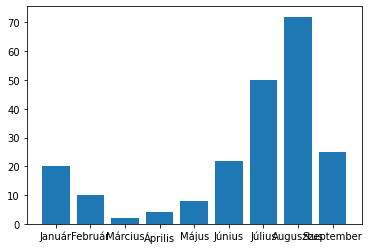

In [22]:
plt.bar(honapok, szabik)

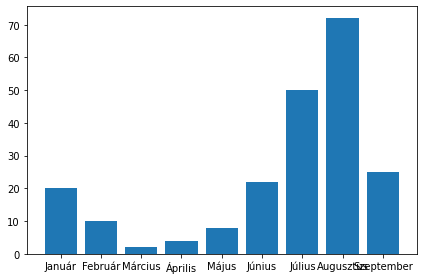

In [23]:
plt.bar(honapok, szabik)
plt.tight_layout()
plt.show()

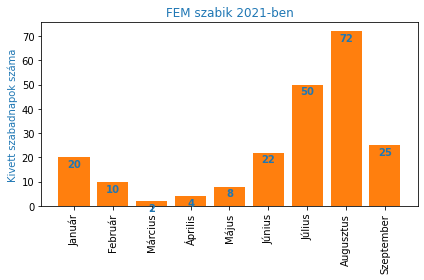

In [24]:
fig, ax = plt.subplots()
ax.bar(honapok, szabik, color='C1')
ax.set_title("FEM szabik 2021-ben", color='C0')
ax.set_ylabel("Kivett szabadnapok száma", color='C0')
# Rotate ticks
plt.xticks(rotation = 90)
# Add labeling
for i, v in enumerate(szabik):
    ax.text(i, v + -5, str(v), color='C0', fontweight='bold', ha='center', va='bottom')
# Auto labeling added from matplotlib verison 3.4 (see ax.bar_label())
plt.tight_layout()

Oszlopdiagrammoknál sokszor szeretnénk az adatokat tovább csoportosítani, hogy két adatsor egymáshoz képesti viszonyát vizsgáljuk.
Ennek a Megoldása MatPlotLibben valamivel komplikáltabb, mint ahogy annak lennie kellene, de természetesen ez is megoldható.
A trükk az, hogy az oszlopokat kézzel kicsit el kell tolni egymáshoz képest az X tengelyen, illetve a szélességüket is megfeleő módon be kell állítani.
### Adatok beolvasása

In [25]:
import csv
with open('CAEszabi.csv') as szabiFile:
    szabireader = csv.reader(szabiFile, delimiter=';')
    for row in szabireader:
        print(', '.join(row))

Month, FEM, BMW, COMP, ADMIN, SUM
Jan, 7, 0, 4, 9, 20
Febr, 4, 0, 0, 6, 10
Márc, 1, 0, 0, 1, 2
Ápr, 1, 1, 0, 2, 4
Máj, 3, 0, 2, 3, 8
Jún, 3, 5, 8, 6, 22
Júl, 10, 18, 10, 12, 50
Aug, 31, 16, 8, 17, 72
Szept, 13, 8, 4, 0, 25
Okt, 3, 3, 1, 3, 10
Nov, 0, 3, 4, 0, 7
Dec, 35, 30, 24, 15, 104
Unplanned, 44, 12, 24, 17, 97


In [48]:
from collections import defaultdict

szabiData = defaultdict(list)
months = []
with open('CAEszabi.csv') as szabiFile:
    szabireader = csv.DictReader(szabiFile, delimiter=';')
    for row in szabireader:
#         print(row)
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group].append(int(row[group]))
        months.append(row['Month'])
    else:
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group] = np.array(szabiData[group]) 
print(szabiData)
print(months)

defaultdict(<class 'list'>, {'FEM': array([ 7,  4,  1,  1,  3,  3, 10, 31, 13,  3,  0, 35, 44]), 'BMW': array([ 0,  0,  0,  1,  0,  5, 18, 16,  8,  3,  3, 30, 12]), 'COMP': array([ 4,  0,  0,  0,  2,  8, 10,  8,  4,  1,  4, 24, 24]), 'ADMIN': array([ 9,  6,  1,  2,  3,  6, 12, 17,  0,  3,  0, 15, 17]), 'SUM': array([ 20,  10,   2,   4,   8,  22,  50,  72,  25,  10,   7, 104,  97])})
['Jan', 'Febr', 'Márc', 'Ápr', 'Máj', 'Jún', 'Júl', 'Aug', 'Szept', 'Okt', 'Nov', 'Dec', 'Unplanned']


### Csoportosított oszlopdiagram

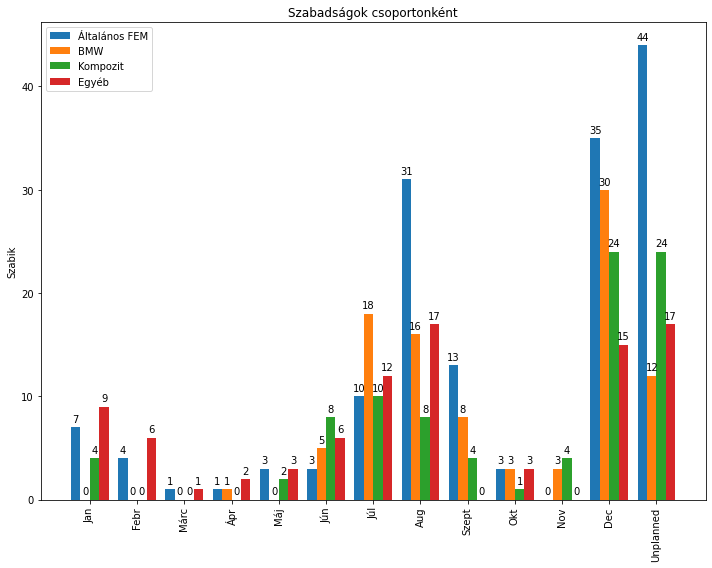

In [49]:
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax.bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax.bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax.bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

ax.bar_label(femPlot, padding=3)
ax.bar_label(bmwPlot, padding=3)
ax.bar_label(compPlot, padding=3)
ax.bar_label(adminPlot, padding=3)

plt.xticks(rotation = 90)

fig.tight_layout()

plt.show()

### Halmozott oszlopdiagram (új stílusban)

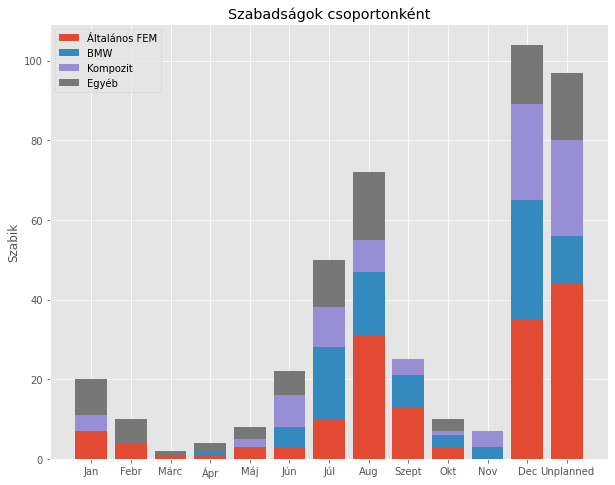

In [51]:
# Use an other plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x, height=szabiData['FEM'], bottom = 0,  label='Általános FEM')
bmwPlot = ax.bar(x, height=szabiData['BMW'], bottom = szabiData['FEM'], label='BMW')
compPlot = ax.bar(x, height=szabiData['COMP'], bottom = szabiData['FEM'] + szabiData['BMW'], label='Kompozit')
adminPlot = ax.bar(x, height=szabiData['ADMIN'], bottom = szabiData['FEM'] + szabiData['BMW'] + szabiData['COMP'],
                   label='Egyéb')

ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

Ugyanez a csoportok létszámára leosztva:

In [53]:
femNum = 7
bmwNum = 4
compNum = 4
adminNum = 3   

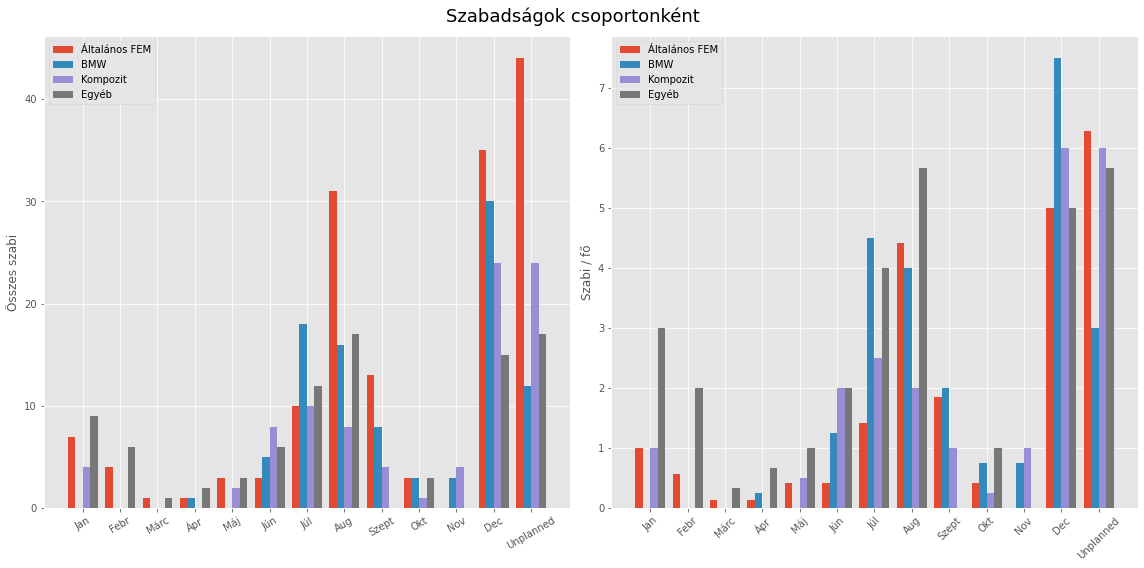

In [68]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=False)

femPlot = ax[0].bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax[0].bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax[0].bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax[0].bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

femPlot = ax[1].bar(x - 3*width/2, height=szabiData['FEM']/femNum, width=width, label='Általános FEM')
bmwPlot = ax[1].bar(x - width/2, height=szabiData['BMW']/bmwNum, width=width, label='BMW')
compPlot = ax[1].bar(x + width/2, height=szabiData['COMP']/compNum, width=width, label='Kompozit')
adminPlot = ax[1].bar(x + 3*width/2, height=szabiData['ADMIN']/adminNum, width=width, label='Egyéb')

fig.suptitle('Szabadságok csoportonként', fontsize = 18)
ax[0].set_ylabel('Összes szabi')
ax[0].set_xticks(x)
ax[0].set_xticklabels(months, rotation=30)
ax[0].legend()
ax[1].set_ylabel('Szabi / fő')
ax[1].set_xticks(x)
ax[1].set_xticklabels(months, rotation=45)
ax[1].legend()


plt.tight_layout()